In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img

In [2]:
print(os.listdir('/content/drive/MyDrive/balls_dataset/test'))

['wiffle ball', 'wrecking ball', 'water polo ball', 'volley ball', 'puffballs', 'paint balls', 'tennis ball', 'soccer ball', 'medicine ball', 'tether ball', 'pokeman balls', 'screwballs', 'meat ball', 'marble', 'golf ball', 'football', 'cricket ball', 'bowling ball', 'buckeyballs', 'brass', 'eyeballs', 'cannon ball', 'billiard ball', 'beachballs', 'baseball', 'basketball']


In [3]:
label_code = {'buckeyballs':0, 'brass':1, 'screwballs':2, 'medicine ball':3, 'puffballs':4, 'bowling ball':5, 'beachballs':6, 'volley ball':7, 'football':8, 'meat ball':9, 'tennis ball':10, 'pokeman balls':11, 'baseball':12, 'water polo ball':13, 'tether ball':14, 'billiard ball':15, 'golf ball':16, 'marble':17, 'cannon ball':18, 'soccer ball':19, 'basketball':20, 'wiffle ball':21, 'eyeballs':22, 'wrecking ball':23, 'paint balls':24, 'cricket ball':25}
label_decode = ['buckeyballs', 'brass', 'screwballs', 'medicine ball', 'puffballs', 'bowling ball', 'beachballs', 'volley ball', 'football', 'meat ball', 'tennis ball', 'pokeman balls', 'baseball', 'water polo ball', 'tether ball', 'billiard ball', 'golf ball', 'marble', 'cannon ball', 'soccer ball', 'basketball', 'wiffle ball', 'eyeballs', 'wrecking ball', 'paint balls', 'cricket ball']

In [4]:
i = 0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/balls_dataset/train'):
    for filename in filenames:
        i += 1
print(i)

3069


In [5]:
i = 0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/balls_dataset/valid'):
    for filename in filenames:
        i += 1
print(i)

130


In [6]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
IMG_CHANNELS = 3
SAMPLES = 3069  #train
SAMPLES2 = 130  #validation
CATEGORIES = 26 # 1 for binary classification problem

X_train = np.zeros((SAMPLES, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype='float32')       
y_train = np.zeros((SAMPLES, CATEGORIES), dtype='int32')         

X_val = np.zeros((SAMPLES2, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype='float32')       
y_val = np.zeros((SAMPLES2, CATEGORIES), dtype='int32')    

In [7]:
from tensorflow.keras.applications.xception import preprocess_input

In [8]:
i = 0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/balls_dataset/train'):
    for filename in tqdm(filenames):
        _path = os.path.join(dirname, filename)
        _img = load_img(_path, color_mode = "rgb", target_size=(IMG_HEIGHT, IMG_WIDTH))  #h, w
        _img = np.array(_img, dtype = 'float32')
        _img = preprocess_input(_img)
        X_train[i,:,:,:3]  = _img
        _label = dirname.split('/')[-1]
        _index = label_code[_label]
        y_train[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
100%|██████████| 92/92 [00:21<00:00,  4.38it/s]


In [9]:
i = 0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/balls_dataset/valid'):
    for filename in tqdm(filenames):
        _path = os.path.join(dirname, filename)
        _img = load_img(_path, color_mode = "rgb", target_size=(IMG_HEIGHT, IMG_WIDTH))  #h, w
        _img = np.array(_img, dtype = 'float32')
        _img = preprocess_input(_img)
        X_val[i,:,:,:3]  = _img
        _label = dirname.split('/')[-1]
        _index = label_code[_label]
        y_val[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
100%|██████████| 5/5 [00:01<00:00,  3.92it/s]


In [10]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=123)
X_val, y_val = shuffle(X_val, y_val, random_state=123)

In [11]:
base_model = tf.keras.applications.Xception(weights='imagenet',input_shape=(150, 150, 3),include_top=False)

83697664/83683744 [==============================] - 0s 0us/step


In [12]:
# base_model.summary()

In [13]:
base_model.trainable = True

In [14]:
inputs = tf.keras.Input(shape=(150, 150, 3))
# x = tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1)(inputs)
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(26, activation = 'softmax' )(x)
model = tf.keras.Model(inputs, outputs)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 20,994,306
Trainable params: 20,939,778
Non-trainable params: 54,528
____________________________________________

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [17]:
hist = model.fit(x = X_train, y = y_train, batch_size = 32, validation_data=(X_val,y_val), epochs=20, verbose=1, shuffle= True)

Epoch 1/20
96/96 [==============================] - 1087s 11s/step - loss: 2.8642 - accuracy: 0.2893 - val_loss: 2.1567 - val_accuracy: 0.4692
Epoch 2/20
96/96 [==============================] - 1063s 11s/step - loss: 1.9035 - accuracy: 0.6302 - val_loss: 1.2211 - val_accuracy: 0.6846
Epoch 3/20
96/96 [==============================] - 1048s 11s/step - loss: 1.1744 - accuracy: 0.7696 - val_loss: 0.7418 - val_accuracy: 0.7923
Epoch 4/20
96/96 [==============================] - 1035s 11s/step - loss: 0.7676 - accuracy: 0.8602 - val_loss: 0.5268 - val_accuracy: 0.8923
Epoch 5/20
96/96 [==============================] - 1027s 11s/step - loss: 0.5133 - accuracy: 0.9133 - val_loss: 0.3792 - val_accuracy: 0.9308
Epoch 6/20
96/96 [==============================] - 1017s 11s/step - loss: 0.3578 - accuracy: 0.9326 - val_loss: 0.2702 - val_accuracy: 0.9538
Epoch 7/20
96/96 [==============================] - 1028s 11s/step - loss: 0.2552 - accuracy: 0.9534 - val_loss: 0.2098 - val_accuracy: 0.9538

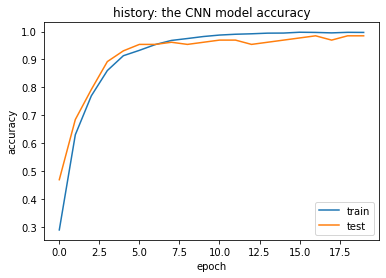

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [19]:
hist.history['accuracy']

[0.28934505581855774,
 0.6301726698875427,
 0.7696318030357361,
 0.8602150678634644,
 0.9133267998695374,
 0.9325513243675232,
 0.9534050226211548,
 0.9680677652359009,
 0.9749103784561157,
 0.9820788502693176,
 0.9872922897338867,
 0.9902248382568359,
 0.9918540120124817,
 0.9941349029541016,
 0.9944607615470886,
 0.9973933100700378,
 0.9967415928840637,
 0.995112419128418,
 0.9970674514770508,
 0.9967415928840637]

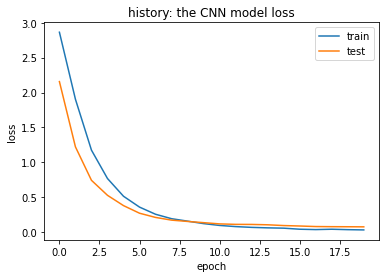

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('history: the CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


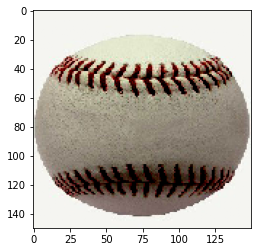

In [21]:
path2 = '/content/drive/MyDrive/balls_dataset/test/baseball/2.jpg'
img = load_img(path2, color_mode = "rgb", target_size=(150, 150))  #h, w
img = np.array(img, dtype = 'float32')
img = preprocess_input(img)
plt.imshow(img)
img = img.reshape(1,150,150,3)

In [22]:
y1 = model.predict(img)  

In [23]:
print(label_decode[np.argmax(y1)])

baseball


In [24]:
model.save_weights('wt220.h5')

In [25]:
model.load_weights('./wt220.h5')